In [4]:
import networkx as nx
from typing import List
import matplotlib.pyplot as plt

def solve(transmissions: List[List[int]], num_servers: int) -> int: 

    G = nx.DiGraph()
    G.add_nodes_from(range(num_servers))

    # Add edges
    for transmission in transmissions:
        G.add_edge(transmission[0], transmission[1])

    counter = 0
    parent_Nodes: set = {0}
    current_Nodes = set({0})
    node_children_set = set()

    

    # find the children node of targeted nodes
    while True:
        # print("\n\nparent_Nodes: ", parent_Nodes)
        # print("current_Nodes: ", current_Nodes)

        for node in current_Nodes:
            # print("targeted_node: ", node)
            
            # find children of parent_Nodes
            targeted_node_ins = G.in_edges(node)
            targeted_node_outs = G.out_edges(node)

            # print("node_inEdges: ", targeted_node_ins)
            for pointingIn_edge in list(targeted_node_ins):
                a, b = pointingIn_edge
                if (a not in parent_Nodes):
                    node_children_set.add(a)

            # print("node_outEdges: ", targeted_node_outs)

            for pointingOut_edge in list(targeted_node_outs):
                # point to 0
                a, b = pointingOut_edge
                
                # do some checking
                if (b not in parent_Nodes):
                    print('change arrow direction from (', a, "->", b, ") to (", b, "->", a, ")")
                    G.remove_edge(a, b)
                    G.add_edge(b, a)
                    node_children_set.add(b)
                    counter+=1


            
        # update node
        # print("next current nodes: ", node_children_set)    
        parent_Nodes  =  current_Nodes
        current_Nodes = node_children_set
        node_children_set = set()

        # break the loop when next current node is empty
        if current_Nodes == None or len(current_Nodes) == 0:
            break
            
    # redraw the graph
    nx.draw(G, with_labels=True)

    print("\nNumber of changed edge: ", counter)

    # check if all node point to 0
    unconnected_list = []
    # Check if central server has a path to every other server
    for i in range(num_servers):
        if nx.has_path(G, i, 0) == False:
            # print("There is no path from source to target:", i)
            unconnected_list.append(i)

    print("\nNumber of node cannot point to source[0]: ", len(unconnected_list))
    

    if len(unconnected_list) > 0:
        print("Nodes that cannot point to source[0]: ", unconnected_list)
        return -1



    return counter

change arrow direction from ( 1 -> 2 ) to ( 2 -> 1 )
change arrow direction from ( 4 -> 5 ) to ( 5 -> 4 )

Number of changed edge:  2

Number of node cannot point to source[0]:  0
Passed test case 1...


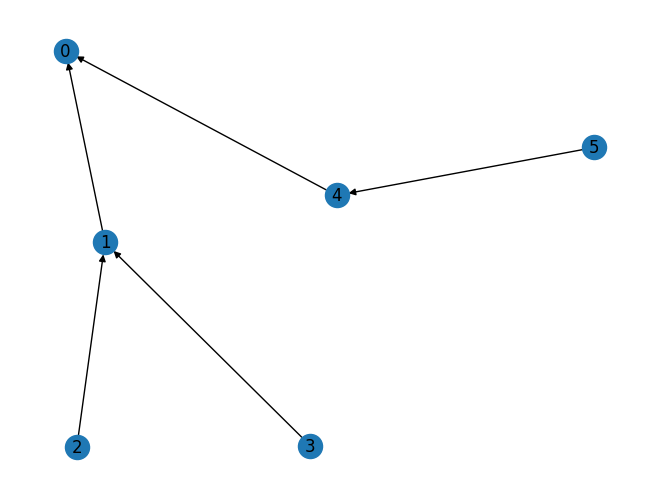

In [5]:
# test case 1
transmissions = [[1, 0], [3, 1], [1, 2], [4,0], [4,5]]
num_servers = 6
answer = 2
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 1: expected {answer}, got {result}"
print('Passed test case 1...')


Number of changed edge:  0

Number of node cannot point to source[0]:  0
Passed test case 2...


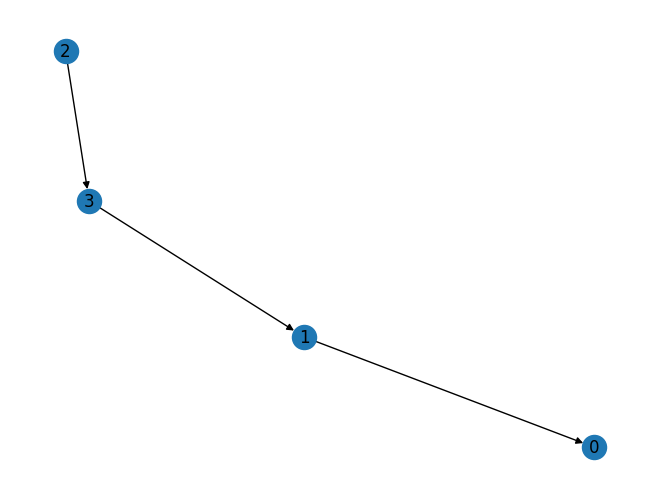

In [3]:
# test case 2
transmissions = [[1, 0], [3, 1], [2, 3]]
num_servers = 4
answer = 0
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 2: expected {answer}, got {result}"
print('Passed test case 2...')

change arrow direction from ( 0 -> 4 ) to ( 4 -> 0 )
change arrow direction from ( 1 -> 6 ) to ( 6 -> 1 )
change arrow direction from ( 2 -> 3 ) to ( 3 -> 2 )
change arrow direction from ( 6 -> 7 ) to ( 7 -> 6 )

Number of changed edge:  4

Number of node cannot point to source[0]:  0
Passed test case 3...


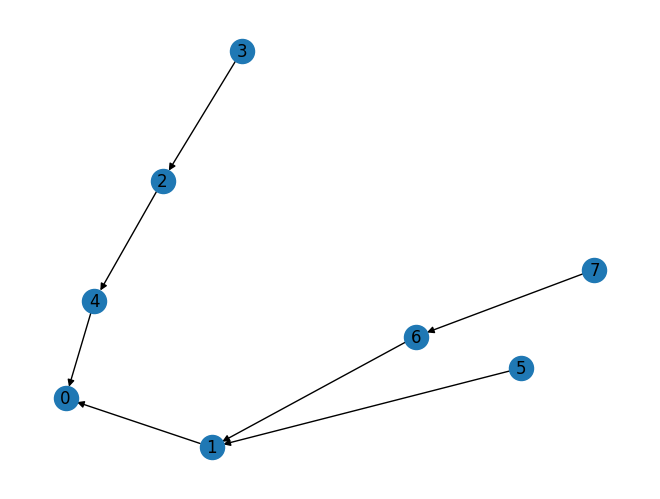

In [3]:
# test case 3
transmissions = [[1, 0], [0,4], [2,4], [5,1], [1,6], [2,3], [6,7]]
num_servers = 8
answer = 4
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 3: expected {answer}, got {result}"
print('Passed test case 3...')

change arrow direction from ( 0 -> 4 ) to ( 4 -> 0 )
change arrow direction from ( 1 -> 6 ) to ( 6 -> 1 )
change arrow direction from ( 2 -> 3 ) to ( 3 -> 2 )
change arrow direction from ( 6 -> 7 ) to ( 7 -> 6 )

Number of changed edge:  4

Number of node cannot point to source[0]:  2
Nodes that cannot point to source[0]:  [8, 9]
Passed test case 4...


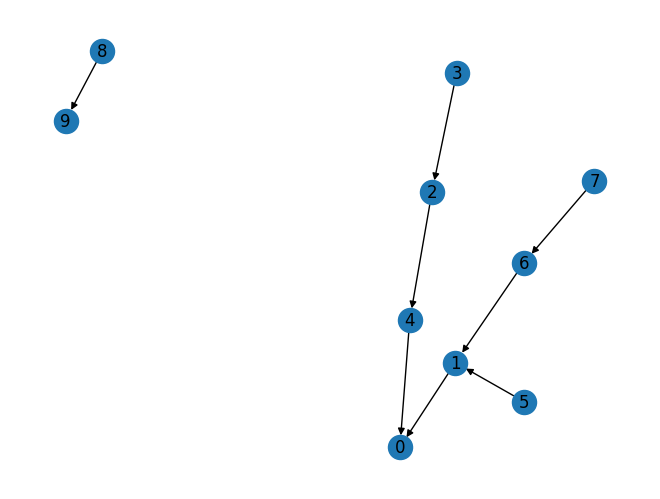

In [4]:
# test case 4
transmissions = [[1, 0], [0,4], [2,4], [5,1], [1,6], [2,3], [6,7], [8,9]]
num_servers = 10
answer = -1
result = solve(transmissions, num_servers)
assert result == answer, f"Test case 4: expected {answer}, got {result}"
print('Passed test case 4...')